In [1]:
import pandas as pd

train  = pd.read_csv('train.csv')                 
test   = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

print(train.shape, test.shape, sample.shape)
train.head()


(1460, 81) (1459, 80) (1459, 2)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<Axes: xlabel='SalePrice', ylabel='Count'>

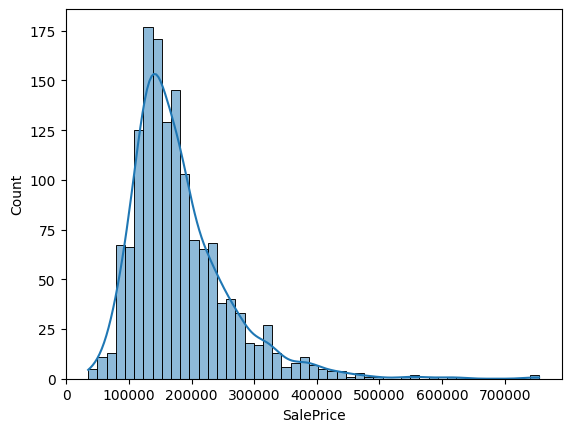

In [7]:
import seaborn as sns
sns.histplot(train['SalePrice'], kde=True)


In [8]:
import os
print(os.getcwd())


C:\Users\kimti\Desktop\Study\ML\house-prices-advanced-regression-techniques


In [4]:
import numpy as np
train['SalePrice_log'] = np.log1p(train['SalePrice'])


In [5]:
train.isna().sum().sort_values(ascending=False).head(20)



PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageYrBlt       81
GarageFinish      81
GarageType        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
MasVnrArea         8
Electrical         1
HouseStyle         0
dtype: int64

In [6]:
train.describe().T


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.0,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.0,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.0,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.0,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.0,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.0,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.0,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.0,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.0,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000


In [9]:

cols_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 
             'FireplaceQu', 'GarageType', 'GarageFinish', 
             'GarageQual', 'GarageCond', 'BsmtQual', 
             'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
             'BsmtFinType2', 'MasVnrType']
for col in cols_none:
    train[col] = train[col].fillna('None')


In [10]:
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)


In [11]:
for col in ('GarageYrBlt', 'MasVnrArea'):
    train[col] = train[col].fillna(train[col].median())


<Axes: xlabel='SalePrice_log', ylabel='Count'>

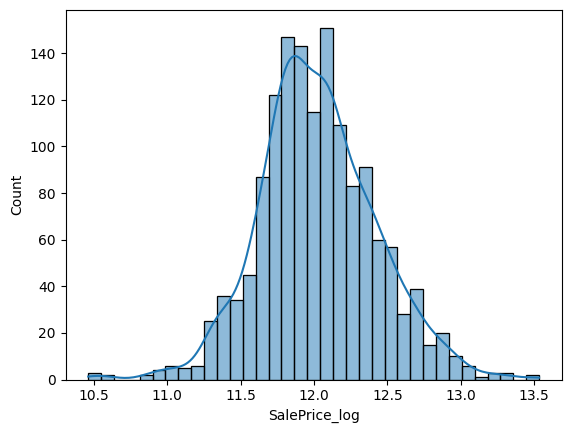

In [12]:
import seaborn as sns
sns.histplot(train['SalePrice_log'], kde=True)


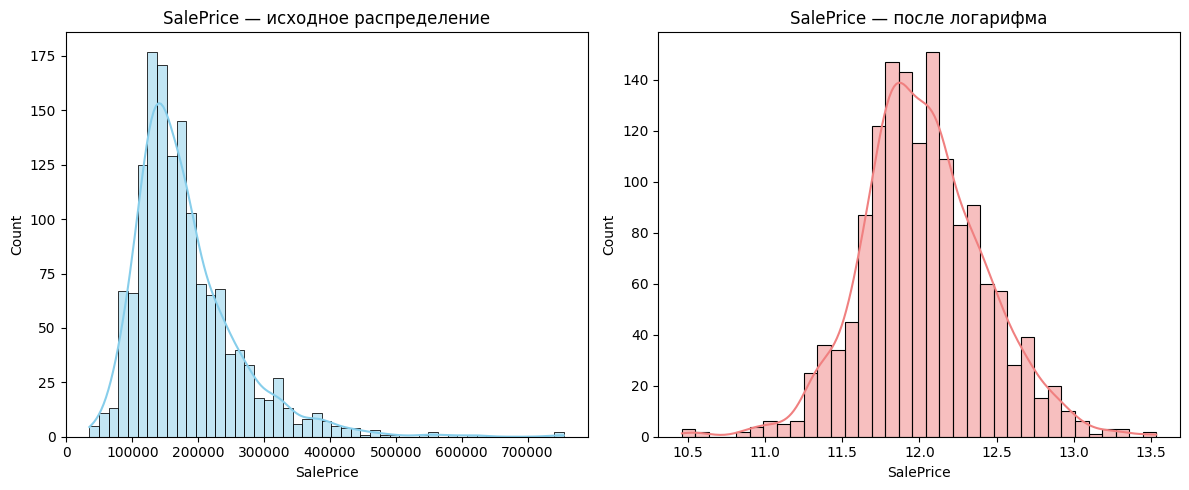

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2 графика рядом
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# До логарифма
sns.histplot(train['SalePrice'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('SalePrice — исходное распределение')

# После логарифма
sns.histplot(np.log1p(train['SalePrice']), kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('SalePrice — после логарифма')

plt.tight_layout()
plt.show()


In [31]:
def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # где NaN означает отсутствие объекта
    cols_none = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu',
                 'GarageType','GarageFinish','GarageQual','GarageCond',
                 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                 'MasVnrType']
    for c in cols_none:
        if c in df.columns:
            df[c] = df[c].fillna('None')

    # числовые спец-случаи
    if 'Neighborhood' in df.columns and 'LotFrontage' in df.columns:
        df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'] \
                                .transform(lambda x: x.fillna(x.median()))
    for c in ['GarageYrBlt','MasVnrArea']:
        if c in df.columns:
            df[c] = df[c].fillna(df[c].median())

    # добиваем остальные пропуски
    num = df.select_dtypes(include=['int64','float64']).columns
    cat = df.select_dtypes(include=['object']).columns
    if len(num) > 0:
        df[num] = df[num].fillna(df[num].median())
    if len(cat) > 0:
        df[cat] = df[cat].fillna(df[cat].mode().iloc[0])

    return df


In [36]:
train_pp = preprocess(train)
test_pp  = preprocess(test)

# сохраним Id и таргет
test_ID = test_pp['Id']
y = train_pp['SalePrice_log']

# было
# feature_cols = train_pp.columns.drop(['SalePrice','SalePrice_log'])

# стало — убираем ещё и Id
feature_cols = train_pp.columns.drop(['SalePrice', 'SalePrice_log', 'Id'])

full = pd.concat(
    [train_pp[feature_cols], test_pp.drop(columns=['Id'])],
    axis=0, ignore_index=True
)

full_ohe = pd.get_dummies(full, drop_first=True)

X      = full_ohe.iloc[:len(train_pp), :].copy()
X_test = full_ohe.iloc[len(train_pp):, :].copy()

print("Shapes:", X.shape, X_test.shape)
print("NaN counts:", X.isna().sum().sum(), X_test.isna().sum().sum())  # должно стать 0 0



Shapes: (1460, 259) (1459, 259)
NaN counts: 0 0


In [37]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

models = {
    'Linear': LinearRegression(),
    'Ridge' : Ridge(alpha=1.0, random_state=42),
    'Lasso' : Lasso(alpha=0.001, max_iter=10000, random_state=42)
}

for name, mdl in models.items():
    mdl.fit(X_tr, y_tr)
    pred = mdl.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, pred))  # RMSE в лог-пространстве
    print(f'{name}: RMSE = {rmse:.4f}')


Linear: RMSE = 0.1734
Ridge: RMSE = 0.1383
Lasso: RMSE = 0.1423


In [39]:
best = Ridge(alpha=1.0, random_state=42)  # если по шагу 5 Ridge лучший
best.fit(X, y)

pred_log = best.predict(X_test)     # предсказания в лог-шкале
pred = np.expm1(pred_log)           # возвращаемся в цены


In [28]:
X.isna().sum().sum(), X_test.isna().sum().sum()



(np.int64(0), np.int64(1789))

In [40]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

best = Ridge(alpha=1.0, random_state=42)
best.fit(X, y)

pred_log = best.predict(X_test)
pred = np.expm1(pred_log)

submission = pd.DataFrame({'Id': test_ID, 'SalePrice': pred})
submission.to_csv('submission.csv', index=False)
print('✅ Saved submission.csv')


✅ Saved submission.csv
